In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_04/')

Mounted at /content/drive


# Imports

In [2]:
from sklearn.datasets import load_iris, load_breast_cancer
import plotly.express as px
import pandas as pd
from src import plots, utils, pipeline as p
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Iris

In [3]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = pd.Series(data.target)
df_iris['target'] = df_iris['target'].apply(lambda x: 0 if x == 0 else 1) # Setosa versus Outras

In [4]:
list_ = []
for wr in [0.04, 0.12, 0.24, 0.36, 0.48]:
    print(f'\n\n\nWR: {wr}')
    realizations_iris, accuracy, std_acc, avg_reject_rate, std_reject_rate = p.pipeline(
        df_iris, 
        model_name='classifier_bayes',
        rejection_cost=wr, 
        type_model='binary', 
        threshold_decision=0.5,
        list_threshold=[0.10, 0.20, 0.30, 0.40],
        verbose_train=False,
        col_target='target',
        train_size=0.8,
        n_realizations=20
    )
    list_.append((wr, accuracy, std_acc, avg_reject_rate, std_reject_rate))

df_wr_iris = pd.DataFrame(list_, columns=['wr', 'acurracy', 'std_acurracy', 'reject_rate', 'std_reject_rate'])




WR: 0.04
Realization 1
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 2
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 3
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 4
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 5
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 6
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 7
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 8
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 9
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 10
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 11
acc:  1.0
reject_rate:  0.0
matrix confusion:
 [[10.  0.]
 [ 0. 20.]]


Realization 12
acc:  1.0
reject_rate:  0

In [6]:
df_wr_iris

,wr,acurracy,std_acurracy,reject_rate,std_reject_rate
0,0.04,1.0,0.0,0.0,0.0
1,0.12,1.0,0.0,0.0,0.0
2,0.24,1.0,0.0,0.0,0.0
3,0.36,1.0,0.0,0.0,0.0
4,0.48,1.0,0.0,0.0,0.0


In [7]:
fig = px.line(df_wr_iris, x='reject_rate', y='acurracy', text='wr')
fig.update_traces(mode='markers+lines')

fig.show()

# Spine

In [8]:
list_col_names = ['incidencia_pelvica', 
                  'inclinacao_pelvica', 
                  'angulo_lordose_lombar', 
                  'inclinacao_sacral', 
                  'radio_pelvico',
                  'grau_espondilolistese', 'target']

df_spine = pd.read_csv('./datasets/vertebral_column/column_3C.dat', names = list_col_names, sep=' ')
dict_ = dict(zip(df_spine['target'].unique().tolist(), range(len(df_spine['target'].unique().tolist()))))

df_spine['target'] = df_spine['target'].apply(lambda row: dict_[row])
df_spine['target'] = df_spine['target'].apply(lambda x: 0 if x == 0 else 1) # Normal versus Anormal

for col in df_spine.columns:
    if col != 'target':
        df_spine = utils.normalize_col(df_spine, col)

In [9]:
df_spine.head(2)

,incidencia_pelvica,inclinacao_pelvica,angulo_lordose_lombar,inclinacao_sacral,radio_pelvico,grau_espondilolistese,target
0,0.355710,0.519829,0.229193,0.250879,0.307452,0.025163,0
1,0.124518,0.296713,0.098622,0.144642,0.476718,0.036359,0


In [10]:
df_spine['target'].value_counts()

1    250
0     60
Name: target, dtype: int64

In [11]:
list_ = []
for wr in [0.04, 0.12, 0.24, 0.36, 0.48]:
    print(f'\n\n\nWR: {wr}')
    realizations_spine, accuracy, std_acc, avg_reject_rate, std_reject_rate = p.pipeline(
        df_spine, 
        model_name='classifier_bayes',
        rejection_cost=wr, 
        type_model='binary', 
        threshold_decision=0.5,
        list_threshold=[0.10, 0.20, 0.30, 0.40],
        verbose_train=False,
        col_target='target',
        train_size=0.8,
        n_realizations=20
    )
    list_.append((wr, accuracy, std_acc, avg_reject_rate, std_reject_rate))

df_wr_spine = pd.DataFrame(list_, columns=['wr', 'acurracy', 'std_acurracy', 'reject_rate', 'std_reject_rate'])




WR: 0.04
Realization 1
acc:  0.9285714285714286
reject_rate:  0.3225806451612903
matrix confusion:
 [[ 2.  1.]
 [ 2. 37.]]


Realization 2
acc:  0.8863636363636364
reject_rate:  0.2903225806451613
matrix confusion:
 [[ 4.  1.]
 [ 4. 35.]]


Realization 3
acc:  0.8666666666666667
reject_rate:  0.27419354838709675
matrix confusion:
 [[ 5.  1.]
 [ 5. 34.]]


Realization 4
acc:  0.9574468085106383
reject_rate:  0.24193548387096775
matrix confusion:
 [[ 5.  0.]
 [ 2. 40.]]


Realization 5
acc:  0.8918918918918919
reject_rate:  0.4032258064516129
matrix confusion:
 [[ 4.  0.]
 [ 4. 29.]]


Realization 6
acc:  0.9130434782608695
reject_rate:  0.25806451612903225
matrix confusion:
 [[ 3.  1.]
 [ 3. 39.]]


Realization 7
acc:  0.925
reject_rate:  0.3548387096774194
matrix confusion:
 [[ 3.  1.]
 [ 2. 34.]]


Realization 8
acc:  0.9534883720930233
reject_rate:  0.3064516129032258
matrix confusion:
 [[ 6.  0.]
 [ 2. 35.]]


Realization 9
acc:  0.9791666666666666
reject_rate:  0.225806451612903

In [12]:
df_wr_spine

,wr,acurracy,std_acurracy,reject_rate,std_reject_rate
0,0.04,0.923438,0.038954,0.285484,0.045949
1,0.12,0.916231,0.033525,0.282258,0.050329
2,0.24,0.930114,0.048114,0.248387,0.050573
3,0.36,0.866732,0.052429,0.097581,0.082155
4,0.48,0.861539,0.051102,0.050806,0.035211


In [13]:
fig = px.line(df_wr_spine, x='reject_rate', y='acurracy', text='wr')
fig.update_traces(mode='markers+lines')

fig.show()

# Artificial I

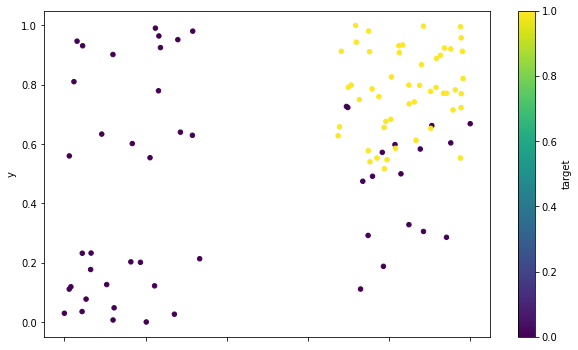

In [20]:
conjunto_1 = utils.make_coords(coord_limit_x = (-1, 1), 
                               coord_limit_y = (3, 5),
                               target= 0,
                               len_set = 16) # Top left

conjunto_2 = utils.make_coords(coord_limit_x = (-1, 1), 
                               coord_limit_y = (1, 2),
                               target= 0,
                               len_set = 17) # Botton left

conjunto_3 = utils.make_coords(coord_limit_x = (3, 5), 
                               coord_limit_y = (1, 3.8),
                               target= 0,
                               len_set = 17) # Bottom right

conjunto_4 = utils.make_coords(coord_limit_x = (3, 5), 
                               coord_limit_y = (3, 5),
                               target= 1,
                               len_set = 50) # Top right


df_artificial_1 = pd.DataFrame(data= conjunto_1 + conjunto_2 + conjunto_3 + conjunto_4, columns=['x', 'y', 'target'])
for col in df_artificial_1.columns:
    if col != 'target':
        df_artificial_1 = utils.normalize_col(df_artificial_1, col)

df_artificial_1.plot.scatter( x='x', y='y', c='target', colormap='viridis', figsize=(10,6))

In [21]:
df_artificial_1['target'].value_counts()

1    50
0    50
Name: target, dtype: int64

In [22]:
list_ = []
for wr in [0.04, 0.12, 0.24, 0.36, 0.48]:
    print(f'\n\n\nWR: {wr}')
    realizations_artificial, accuracy, std_acc, avg_reject_rate, std_reject_rate = p.pipeline(
        df_artificial_1, 
        model_name='classifier_bayes',
        rejection_cost=wr, 
        type_model='binary', 
        threshold_decision=0.5,
        list_threshold=[0.10, 0.20, 0.30, 0.40],
        verbose_train=False,
        col_target='target',
        train_size=0.8,
        n_realizations=20
    )
    list_.append((wr, accuracy, std_acc, avg_reject_rate, std_reject_rate))

df_wr_artificial = pd.DataFrame(list_, columns=['wr', 'acurracy', 'std_acurracy', 'reject_rate', 'std_reject_rate'])




WR: 0.04
Realization 1
acc:  1.0
reject_rate:  0.3
matrix confusion:
 [[8. 0.]
 [0. 6.]]


Realization 2
acc:  1.0
reject_rate:  0.35
matrix confusion:
 [[7. 0.]
 [0. 6.]]


Realization 3
acc:  1.0
reject_rate:  0.3
matrix confusion:
 [[10.  0.]
 [ 0.  4.]]


Realization 4
acc:  1.0
reject_rate:  0.25
matrix confusion:
 [[7. 0.]
 [0. 8.]]


Realization 5
acc:  1.0
reject_rate:  0.2
matrix confusion:
 [[9. 0.]
 [0. 7.]]


Realization 6
acc:  1.0
reject_rate:  0.35
matrix confusion:
 [[7. 0.]
 [0. 6.]]


Realization 7
acc:  1.0
reject_rate:  0.25
matrix confusion:
 [[9. 0.]
 [0. 6.]]


Realization 8
acc:  1.0
reject_rate:  0.2
matrix confusion:
 [[9. 0.]
 [0. 7.]]


Realization 9
acc:  1.0
reject_rate:  0.3
matrix confusion:
 [[7. 0.]
 [0. 7.]]


Realization 10
acc:  1.0
reject_rate:  0.3
matrix confusion:
 [[7. 0.]
 [0. 7.]]


Realization 11
acc:  1.0
reject_rate:  0.25
matrix confusion:
 [[7. 0.]
 [0. 8.]]


Realization 12
acc:  0.8666666666666667
reject_rate:  0.25
matrix confusion

In [23]:
df_wr_artificial

,wr,acurracy,std_acurracy,reject_rate,std_reject_rate
0,0.04,0.986429,0.035274,0.2700,0.049736
1,0.12,0.959077,0.059552,0.2425,0.099041
2,0.24,0.947887,0.076510,0.1875,0.116839
3,0.36,0.911606,0.066066,0.0925,0.119511
4,0.48,0.890428,0.051573,0.0250,0.047295


In [24]:
fig = px.line(df_wr_artificial, x='reject_rate', y='acurracy', text='wr')
fig.update_traces(mode='markers+lines')

fig.show()